# Introduction

According to [Statista](https://www.statista.com/statistics/237974/online-advertising-spending-worldwide/), the digital advertising spending worldwide will be 876 billion dollars in 2026. For 2021 the spending was 521 billion dollars, so this market can grow approximately 40% in the next 5 years. Pandemic was a critical factor that accelerate digital advertising spending.


On a global scale, we can assume this is a competitive market but we can identify some big players such as Google, Meta platforms, amazon, Microsoft, and Twitter.

Google, Meta, and Twitter are the best fit for this sector because the majority of their earnings are from advertising. However, Amazon and Microsoft operate in many sectors and one of them is digital advertising. For 2021 amazon was the third biggest advertiser in the US after Google and meta. Furthermore, Microsoft has a lot of advertising revenue streams such as LinkedIn and search engine advertising.

In this project, I will analyze some financial data for these companies and I will try to identify trends and patterns for the past 5 years.

Here are some questions I will try to answer:

* What was the daily average return for each stock?
* What patterns we can identify with the moving averages?
* What was the correlation between these daily returns?
* Which stocks are more volatile?
* How much value do we gain regarding the risk ?
* What is the value at Risk for each stock for different time frames?

And finally, I will perform some Monte Carlo simulations to predict the future possible outcomes for the stock prices.



## Libraries & Data Collection

### Data

* I use the **yfinance** library to collect the **daily adjusted close prices** for the companies: Google, Meta Platforms, Microsoft, Amazon, and Twitter. The time period is **five years**

In [22]:
#collect and analyze financial data
import yfinance as yf
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from pandas_datareader import data as pdr
from scipy.stats import norm



#vizualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#this is the list with the desire stocks
symbols = ["GOOGL", "FB", "MSFT", "AMZN" ,"TWTR"]

#we want to analyze them for the past 5 years
start_date = '2017-05-18'
end_date = '2022-05-18'

#collect the daily adjusted close prices for these stocks
data = pdr.get_data_yahoo(symbols, start_date, end_date)['Adj Close']


In [2]:
#examine our data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-05-18 to 2022-05-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOGL   1260 non-null   float64
 1   FB      1260 non-null   float64
 2   MSFT    1260 non-null   float64
 3   AMZN    1260 non-null   float64
 4   TWTR    1260 non-null   float64
dtypes: float64(5)
memory usage: 59.1 KB


* The first step is to clear our data if needed. we observe there is not any null value and the type of our data is correct so we can move to the next step.

In [3]:
data.describe()

Symbols,GOOGL,FB,MSFT,AMZN,TWTR
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,1576.802444,220.418159,168.381609,2244.014270,38.483611
std,634.387128,63.823143,80.621617,836.946719,13.793923
min,919.460022,124.059998,63.402092,938.599976,15.750000
25%,1103.589966,173.474995,99.806530,1640.200012,30.120001
50%,1258.145020,194.050003,141.460869,1904.590027,35.465000
75%,2034.495026,266.792503,231.599712,3161.604980,45.105001
max,2996.770020,382.179993,341.606354,3731.409912,77.629997


* With this table, we can understand our data faster. The count is 1260 for every variable, everything looks good so let's continue. We will work mostly with the daily returns for this project. 


* We use The adjusted closing price of the stocks because reflects the stock's value after accounting for any corporate actions. Let's plot these data 

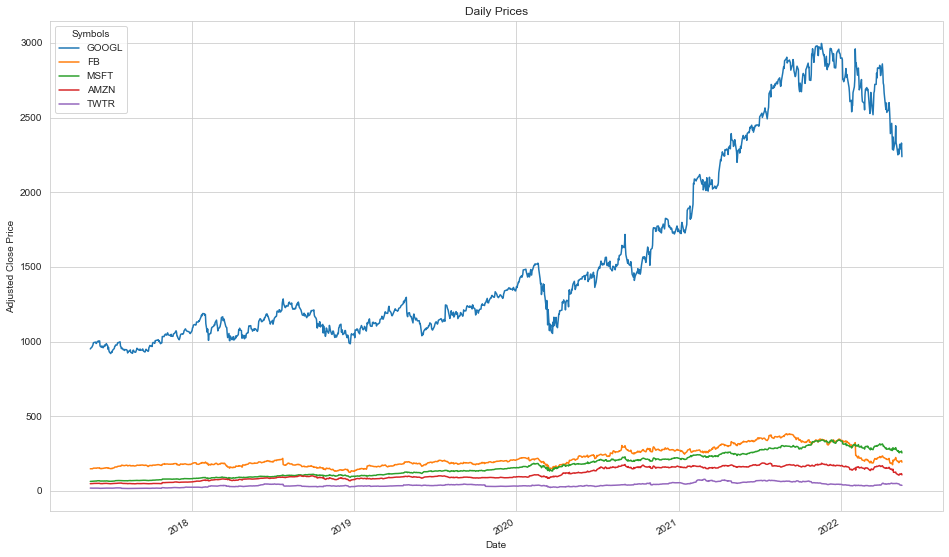

In [23]:
data.plot(figsize=(16,10))
plt.title('Daily Prices')
plt.ylabel('Adjusted Close Price')
plt.show()

* As we can see from this plot we can't compare the past performance of these stocks so for the next step we will log these prices. 

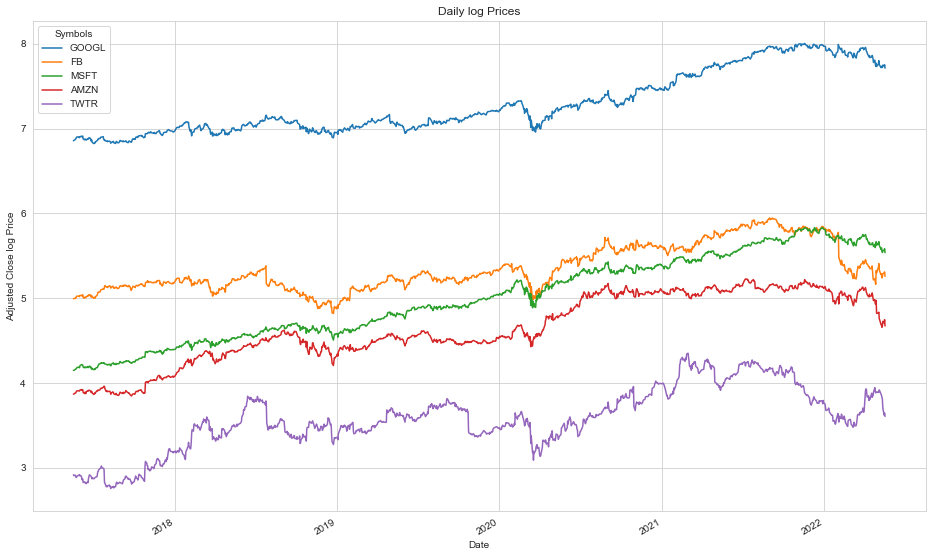

In [24]:
#create the log plot
np.log(data).plot(figsize=(16,10))
plt.title('Daily log Prices')
plt.ylabel('Adjusted Close log Price')
plt.show()

Now we have better understaning of which stock perform better regarding others.
 
For this plot we can notice Meta Platforms(ex Facebook), Microsoft and Amazon had similar performance, while Twitter has the biggest volatily between these stocks.

However if we want to make reliable predictions and analysis in timeseries data then these data should be **stationary**. The most common method is by calculating the dailty returns of these stocks. 

Before we procced in this step lets analyze the moving averages for 50, 200 day to indentify trends for these stocks.

# Technical Analysis

For identifying significant, long-term support and resistance levels and overall trends, the 50-day, 100-day and 200-day moving averages are the most common. Based on historical statistics, these longer-term moving averages are considered more reliable trend indicators and less susceptible to temporary fluctuations in price. The 200-day moving average is considered especially significant in stock trading. As long as the 50-day moving average of a stock price remains above the 200-day moving average, the stock is generally thought to be in a bullish trend. A crossover to the downside of the 200-day moving average is interpreted as bearish.

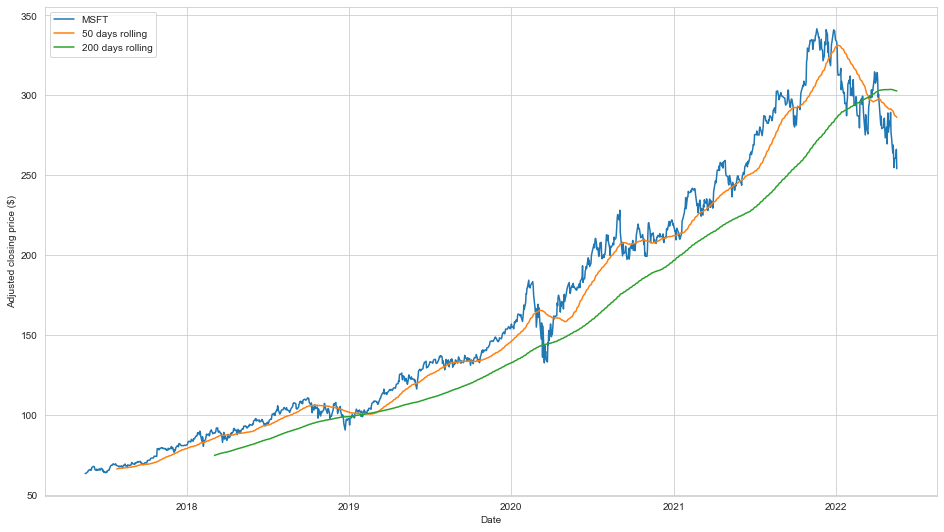

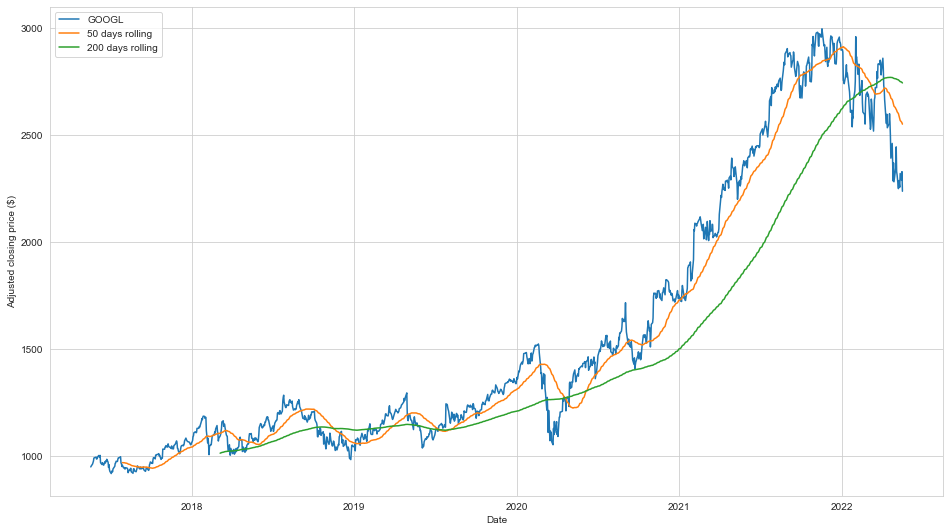

In [25]:
# Get the MSFT timeseries.
msft = data["MSFT"]

# Calculate the 50 and 200 days moving averages of the closing prices
short_rolling = msft.rolling(window=50).mean()
long_rolling = msft.rolling(window=200).mean()

# Plot the graph
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling.index, short_rolling, label='50 days rolling')
ax.plot(long_rolling.index, long_rolling, label='200 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

# Get the Google timeseries.
google = data["GOOGL"]

# Calculate the 50 and 200 days moving averages of the closing prices
short_rolling = google.rolling(window=50).mean()
long_rolling = google.rolling(window=200).mean()

# Plot the graph
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(google.index, google, label='GOOGL')
ax.plot(short_rolling.index, short_rolling, label='50 days rolling')
ax.plot(long_rolling.index, long_rolling, label='200 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

We can notice from these graphs for 2020 the 50-day moving average was above the 200-day average with a significant difference. But this trend reverses in 2022.

Keep in mind that 2020-2021 was a great period for tech stocks because of the pandemic. This increased the demand for work to home, new equipment, and maybe the most significant factor, the fed dropped the fed rates close to 0.

From 2022 fed starts to increase its rating and the market starts to price this change. Furthermore, keep in mind markets are always forward-looking

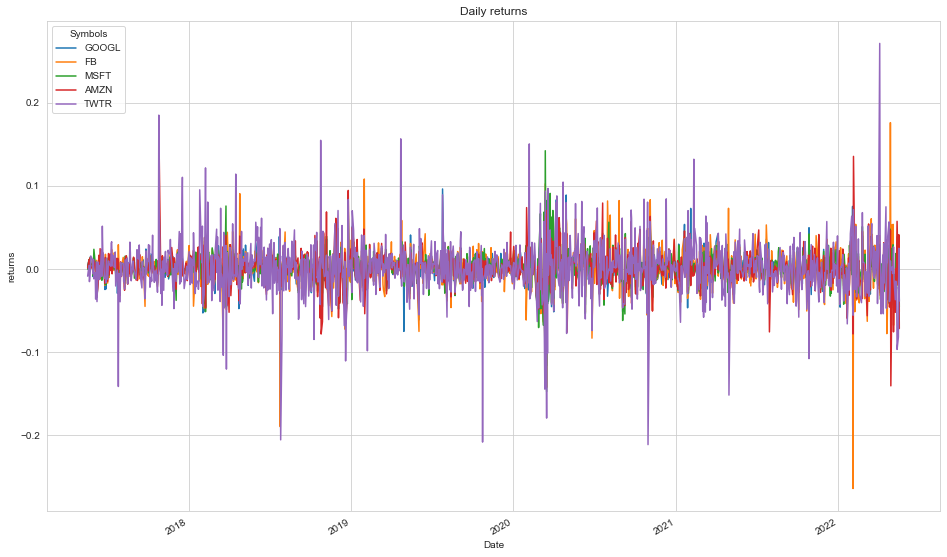

In [26]:
#calculate the daily returns for the stocks (eliminate the uptrend)
daily_returns = data.pct_change().dropna()
daily_returns.plot(figsize=(16,10))
plt.title('Daily returns')
plt.ylabel('returns')
plt.show()



Now we eliminate the upward trend in the time series and our values **move around zero** this means we are closer to stationarity than before. We are ready to continue our analysis and forecasting

In [8]:
#modify the table for better representantion
returns_stats = (daily_returns * 100).describe()
returns_stats.round(2)[1:]

Symbols,GOOGL,FB,MSFT,AMZN,TWTR
mean,0.08,0.05,0.13,0.09,0.11
std,1.81,2.40,1.83,2.06,3.31
min,-11.63,-26.39,-14.74,-14.05,-21.11
25%,-0.68,-0.97,-0.67,-0.86,-1.40
50%,0.12,0.11,0.14,0.13,0.10
75%,0.99,1.27,1.05,1.10,1.53
max,9.62,17.59,14.22,13.54,27.12


From this table, we can gain a lot of information. For example, we can observe that amazon and google have almost sta same mean which means the almost same daily returns but amazon has a greater standard deviation from google which means amazon has more risk.

Also, we can notice Twitter is more volatile than the other stocks something expected as Twitter is a smaller company with limited revenue streams.

The next step in our analysis is to plot histograms. We want to observe the shape, the wider the space the more volatility the stock is. For this plot, I use bins = 100 for better illustration.
## Histograms

<AxesSubplot:>

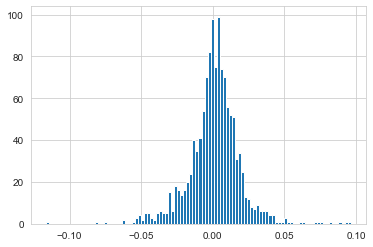

In [27]:
daily_returns["GOOGL"].hist(bins = 100, label = 'GOOGL')

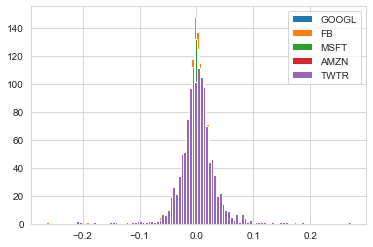

In [15]:
daily_returns["GOOGL"].hist(bins = 100, label = 'GOOGL')
daily_returns["FB"].hist(bins = 100, label = 'FB')
daily_returns["MSFT"].hist(bins = 100, label = 'MSFT')
daily_returns["AMZN"].hist(bins = 100, label = 'AMZN')
daily_returns["TWTR"].hist(bins = 100, label = 'TWTR')
plt.legend()

This graph looks complicate at the first glance. However, we cant observe twitter has a wider shape and after Twitter, we observe FB with the orange color. From this graph, these 2 stocks have the greater volatility. But what about the other data?

let's use the **KDE (Kernel Density Estimate)** to make our graph more interpretable.

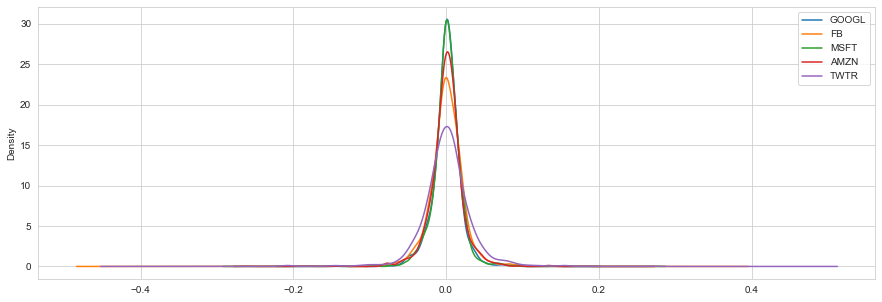

In [16]:
#caluculate the KDE and plot.
daily_returns["GOOGL"].plot(kind = 'kde', label = 'GOOGL', figsize = (15,5))
daily_returns["FB"].plot(kind = 'kde', label = 'FB', figsize = (15,5))
daily_returns["MSFT"].plot(kind = 'kde', label = 'MSFT', figsize = (15,5))
daily_returns["AMZN"].plot(kind = 'kde', label = 'AMZN', figsize = (15,5))
daily_returns["TWTR"].plot(kind = 'kde', label = 'TWTR', figsize = (15,5))
plt.legend()

This graph reveals more information about our data and its looks better. The widest shape belongs to Twitter. The second is a little trick to observe because amazon and FB are very close.

## Correlations

Now I will use the pair plot and the heatmap to observe any relationship between our data

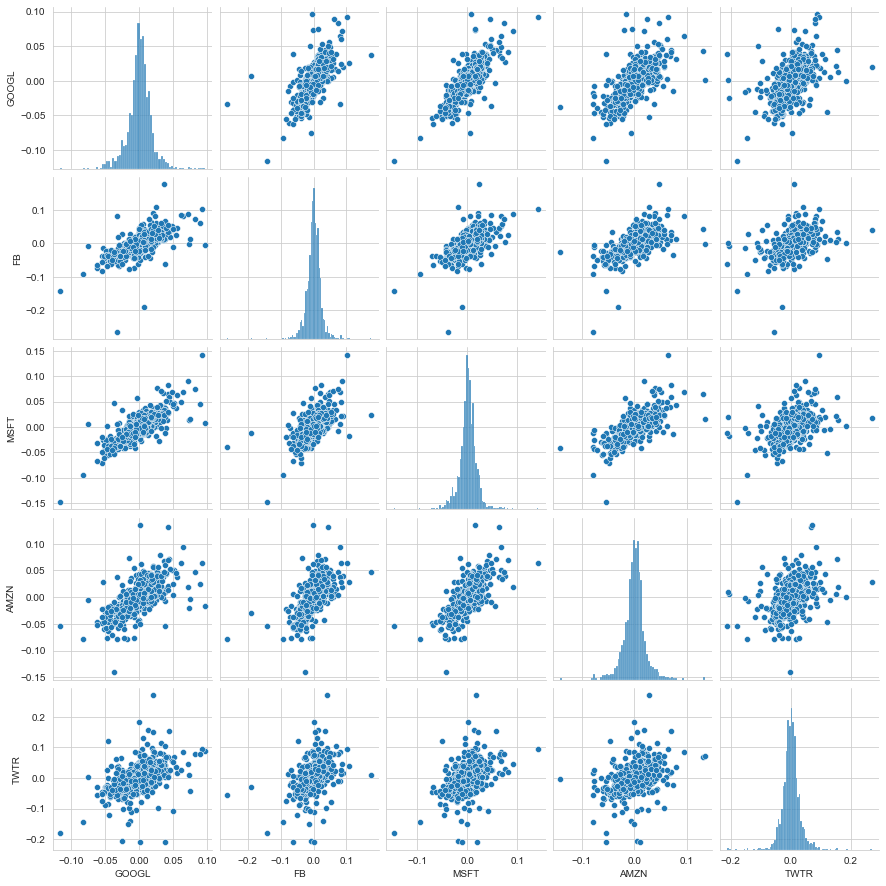

In [17]:
sns.pairplot(daily_returns)

With the pair plot graph, we can observe if our data have any relationship. For example, we can see Microsoft and Google have a positive correlation. Also, we can observe google and FB have some kind of a positive correlation which make sense as they are the biggest advertisers. On the other size, Twitter seems to have some type of relationship only with google.

### Heatmap

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

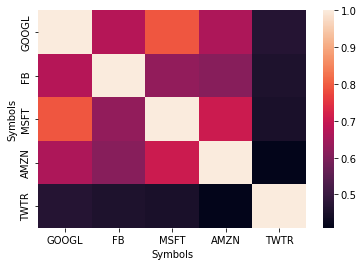

In [4]:
sns.heatmap(daily_returns.corr())

we can use this heat map to understand better the correlations between our data. The closer data is to -1.0 the greater the positive correlations have and vice versa. As we can see Twitter is negatively correlated with every other company. Furthermore, we can't find very close correlations between other variables.

## Risk And Exepcted Returns

In finance, we use the mean of daily returns as expected return and standard deviation as risk. If we plot them we can create with graph. 

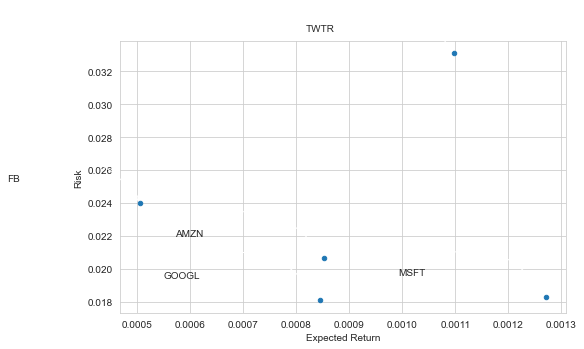

In [31]:
#risk and expected returns

plt.figure(figsize=(8,5))

plt.scatter(daily_returns.mean(),daily_returns.std(),s=20)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(daily_returns.columns,daily_returns.mean(),daily_returns.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))
    

From this graph, we can observe which stock gives us better risk-adjusted returns. As we can see Microsoft is the clear winner here, has the most significant expected returns, and almost the lowest risk.

# Value at riks

Value at risk (VaR) is a statistic that quantifies the extent of possible financial losses within a firm, portfolio, or position over a specific time frame. This metric is most commonly used by investment and commercial banks to determine the extent and probabilities of potential losses in their institutional portfolios.

There are three main ways of computing VaR. The first is the historical method, which looks at one's prior returns history and orders them from worst losses to greatest gains—following from the premise that past returns experience will inform future outcomes.

The second is the variance-covariance method. Rather than assuming the past will inform the future, this method instead assumes that gains and losses are normally distributed. This way, potential losses can be framed in terms of standard deviation events from the mean.

A final approach to VaR is to conduct a Monte Carlo simulation. This technique uses computational models to simulate projected returns over hundreds or thousands of possible iterations. Then, it takes the chances that a loss will occur, say 5% of the time, and reveals the impact.

For this project, I will use the first and the third method to analyze the value at risk 

## Historical Method For VaR

We will analyze the historical value at risk for two time frames: one and two years.

Text(0.0, 1.0, '2 year time frame')

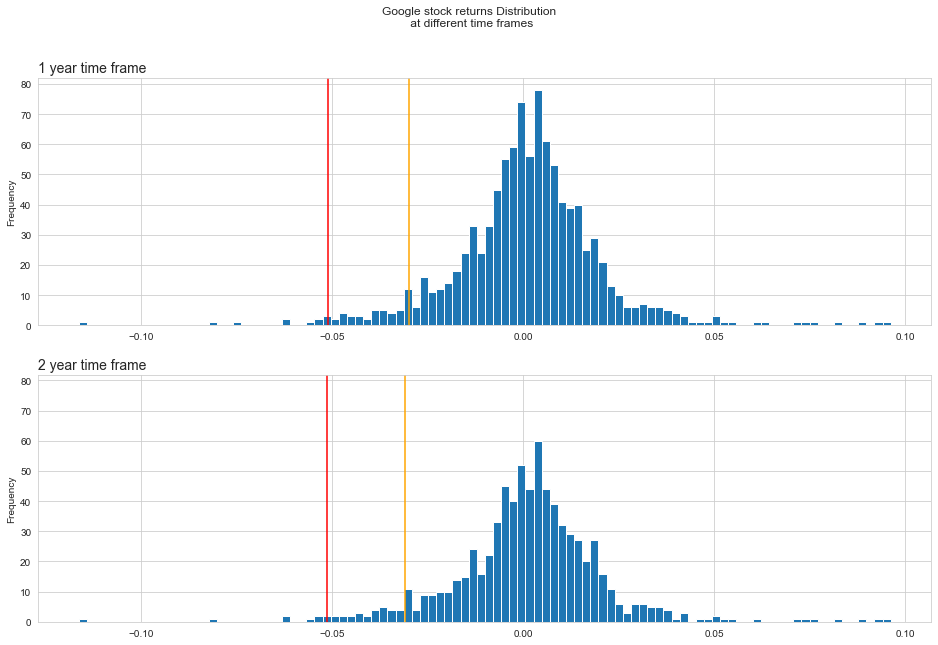

In [29]:
#historical method for VaR
fig, [ax1, ax2] = plt.subplots(2, 1, sharey= True, figsize=(16, 10) )
fig.suptitle("Google stock returns Distribution \n at different time frames")

# let's build our historical method for 1-year time frame
#typically one trading year has 253 days
historically1 = daily_returns["GOOGL"][253:].dropna()
ax1 = historically1.plot(kind = 'hist', bins = 100, ax = ax1)

#calculate the var for confidence level 95% 
ax1.axvline(np.percentile(historically1, 5), color = 'orange', label = '5%')

#calculate the var for confidence level 99% 
ax1.axvline(np.percentile(historically1, 1), color = 'red', label = '1%')
ax1.set_title('1 year time frame', loc='left', fontsize = 14)

#let's build our historical method for 2-year time frame
historically2 = daily_returns["GOOGL"][2*253:].dropna()
ax2 = historically2.plot(kind = 'hist', bins = 100, ax = ax2)

#calculate the var for confidence level 95% 
ax2.axvline(np.percentile(historically2, 5), color = 'orange', label = '5%')

#calculate the var for confidence level 99%
ax2.axvline(np.percentile(historically2, 1), color = 'red', label = '1%')
ax2.set_title('2 year time frame', loc= 'left', fontsize = 14)




## Monte Carlo Simulation

Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models.

For more information on how to build this model check here: https://www.investopedia.com/terms/m/montecarlosimulation.asp#:~:text=A%20Monte%20Carlo%20simulation%20is,in%20prediction%20and%20forecasting%20models.

In [33]:
log_returns = np.log(1 + daily_returns['GOOGL'])


u = log_returns.mean()

var = log_returns.var()


drift = u - (0.5*var)

stdev = log_returns.std()

np.array(drift)
#if an event has a change 95% of occurring, the distance between this event and the mean = norm.ppf(0.95)
norm.ppf(0.95)

# now we calulate the second part of the formula
x = np.random.rand(10, 2)

#calculate z, the distance between the mean and the events, expressed as a number of standard deviations
z = norm.ppf(np.random.rand(10, 2))

#let's calculate daily returns, we want to predict the stock prices for the next 253 days with 1000 series 
t_intervals = 253
iterations = 1000

forcast_returns = np.exp(np.array(drift) + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))


#we need to define the starting stock price, which is the last row from our (data) DataFrame
s0 = data.iloc[-1]['GOOGL']

#we create a new array with the exact dimension of the array forcast_returns and then we fill this array with 0s 
prices_list = np.zeros_like(forcast_returns)

#now we assign the first element to be our last stock price
prices_list[0] = s0

#the next step is to fill this array with our simulations
for t in range(1, t_intervals):
    prices_list[t] = prices_list[t - 1] * forcast_returns[t]

prices_list

array([[2237.98999023, 2237.98999023, 2237.98999023, ..., 2237.98999023,
        2237.98999023, 2237.98999023],
       [2225.79609535, 2239.16221468, 2207.03543055, ..., 2220.75448604,
        2224.11070091, 2167.98078951],
       [2218.63831206, 2228.23287727, 2188.19848531, ..., 2271.48380237,
        2305.42672138, 2217.1340743 ],
       ...,
       [2911.23357399, 3076.80601264, 3795.45974143, ..., 2206.2411321 ,
        2195.51400742, 2723.68377493],
       [2938.88289134, 2967.07728422, 3789.71848874, ..., 2198.6170735 ,
        2128.2066181 , 2704.4601768 ],
       [2958.97579996, 2900.8070487 , 3861.22663101, ..., 2190.26800701,
        2086.03078084, 2708.31988926]])

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

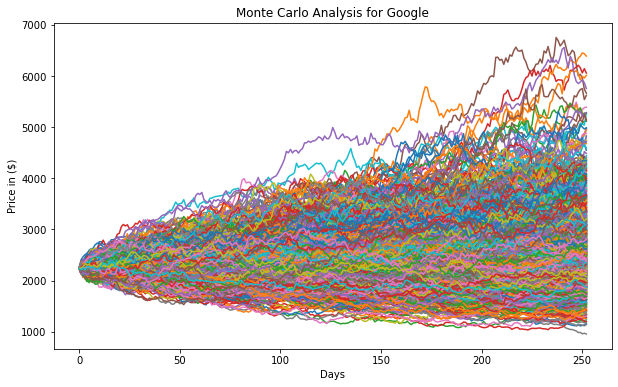

In [16]:
#now lets plot every simulation
plt.figure(figsize=(10,6))
plt.plot(prices_list)
plt.xlabel('Days')
plt.ylabel('Price in ($)')
plt.title('Monte Carlo Analysis for Google')

In [71]:
print('The starting price before the simulations was: ', round(s0,2),'$')

print('The average final price for Google after 1,000 simulations is: ', round(prices_list.mean(),2),'$')

#calculate the confidendence level 95% 
var95 = np.percentile(prices_list,5)
print('We are 95% confident after 252 days Google stock price will be above:', round(var95,2), '$')

#calculate the confidendence level 99%
var99 = np.percentile(prices_list,1)
print('We are 99% confident  after 252 days Google stock price will be above:', round(var99,2), '$')


The starting price before the simulations was:  2237.99 $
The average final price for Google after 1,000 simulations is:  2419.87 $
We are 95% confident after 252 days Google stock price will be above: 1697.27 $
We are 99% confident  after 252 days Google stock price will be above: 1456.48 $
